In [1]:
import pandas as pd

In [2]:
tf_df = pd.read_excel('2019_2023_서울시교통량_결측값처리.xlsx')

In [3]:
tf_df['일 통행량(1,000대/일)'] = tf_df['일 통행량'] / 1000

## 서울시 교통량 시각화

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")
# %matplotlib inline
rc("font", family="Malgun Gothic")

import warnings
warnings.filterwarnings(action='ignore') # 경고창 무시

In [5]:
tf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45650 entries, 0 to 45649
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   일자               45650 non-null  int64  
 1   구                45650 non-null  object 
 2   지점번호             45650 non-null  object 
 3   전체 통행량           45650 non-null  object 
 4   일 통행량            45650 non-null  float64
 5   일 통행량(1,000대/일)  45650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.1+ MB


### 1. 기초통계 (2019~2023 전체)

In [6]:
# 서울 전체 - 자치구별 교통량 통계 (단위 : 1,000대)
gu_daily_stats = tf_df.groupby('구')['일 통행량(1,000대/일)'].agg(['mean', 'median', 'std', 'sum', 'count', 'max', 'min']).reset_index()
gu_daily_stats.head(2)

,구,mean,median,std,sum,count,max,min
0,강남구,80.083759,81.5095,11.232325,146232.9448,1826,100.474,25.4963
1,강동구,90.956615,90.6545,15.161848,166086.7781,1826,117.348,17.8783


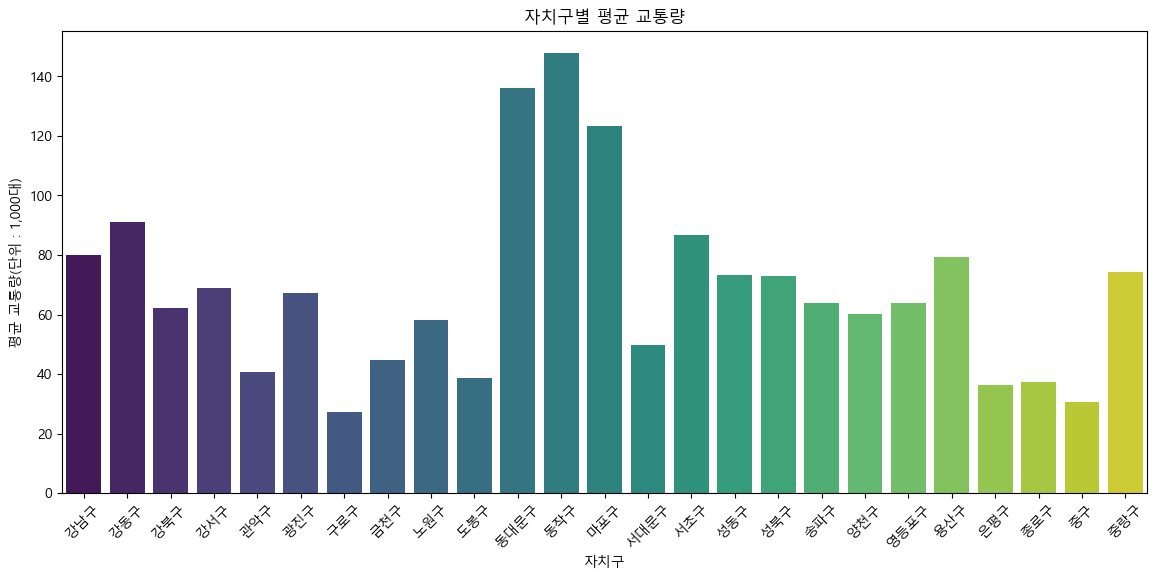

In [7]:
# 자치구별 평균 교통량 통계 
plt.figure(figsize=(14, 6))
sns.barplot(x='구', y='mean', data=gu_daily_stats, palette='viridis')
plt.title('자치구별 평균 교통량')
plt.xticks(rotation=45)
plt.xlabel('자치구')
plt.ylabel('평균 교통량(단위 : 1,000대)')
plt.show()

In [8]:
import numpy as np

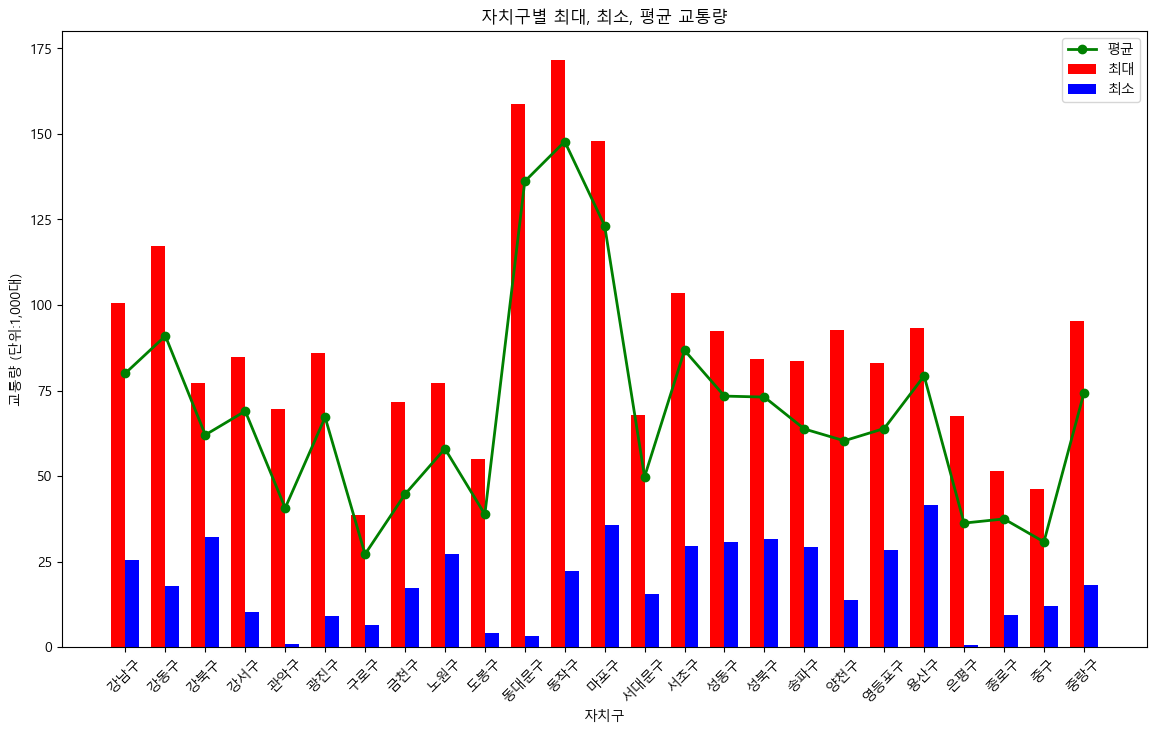

In [9]:
# 자치구별 교통량에 대한 통계값 그래프

plt.figure(figsize=(14, 8))
bar_width = 0.35
districts = gu_daily_stats['구']
bar_positions = np.arange(len(districts))


# 최대값 바
plt.bar(bar_positions - bar_width/2, gu_daily_stats['max'], width=bar_width, color='red', label='최대')


# 최소값 바
plt.bar(bar_positions + bar_width/2, gu_daily_stats['min'], width=bar_width, color='blue', label='최소')


# 평균값 선 그래프
plt.plot(bar_positions, gu_daily_stats['mean'], color='green', marker='o', linestyle='-', label='평균', linewidth=2)

plt.xlabel('자치구')
plt.ylabel('교통량 (단위:1,000대)')
plt.title('자치구별 최대, 최소, 평균 교통량')
plt.xticks(bar_positions, districts, rotation=45)
plt.legend()
plt.show()

요일별 특징 분석

In [10]:
df = tf_df[['일자', '일 통행량(1,000대/일)']]

# 날짜 및 시간 형식 변환
df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')

# 인덱스를 datetime으로 지정
df.set_index('일자', inplace=True)

# '일 통행량' column만 사용
df = df[['일 통행량(1,000대/일)']]

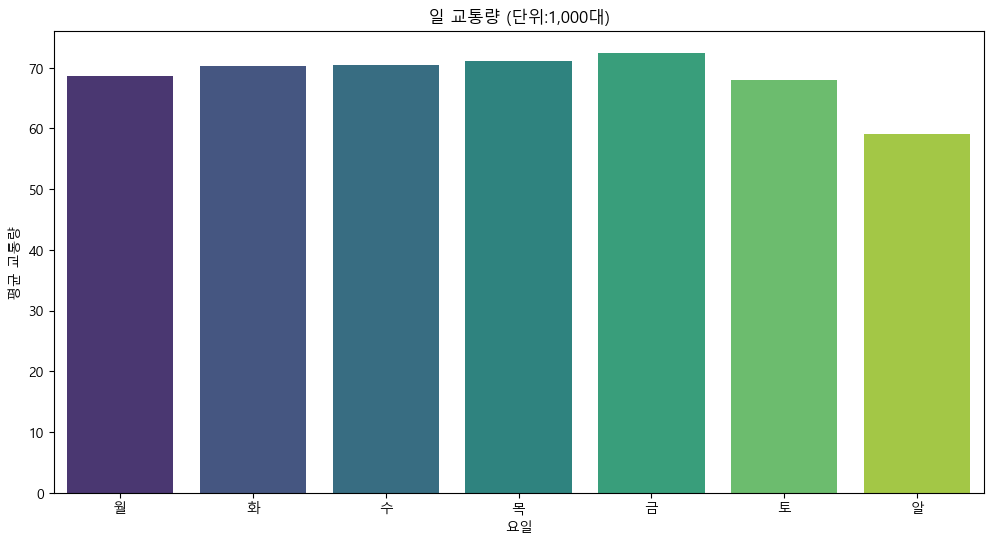

In [11]:
# 일별 분석
from statsmodels.tsa.seasonal import seasonal_decompose

df['day_of_week'] = df.index.dayofweek  # 0: Monday, 6: Sunday
day_tf_df = df.groupby('day_of_week').mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=day_tf_df.index, y='일 통행량(1,000대/일)', data=day_tf_df, palette='viridis')
plt.title('일 교통량 (단위:1,000대)')
plt.xlabel('요일')
plt.ylabel('평균 교통량')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],labels=['월', '화', '수', '목', '금', '토', '알'])
plt.show()

2019년 ~ 2023년 까지 금요일이 가장 교통량이 많고 일요일이 가장 낮은 경향을 보임

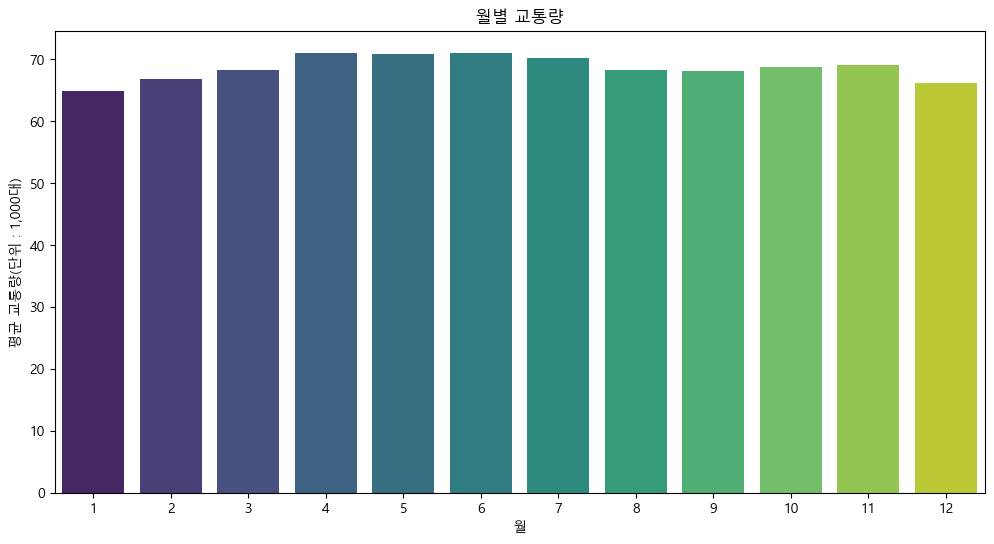

In [12]:
# 월 분석
df['month'] = df.index.month
monthly_traffic = df.groupby('month').mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_traffic.index, y='일 통행량(1,000대/일)', data=monthly_traffic, palette='viridis')
plt.title('월별 교통량')
plt.xlabel('월')
plt.ylabel('평균 교통량(단위 : 1,000대)')
plt.show()

전체적으로 나들이 시기가 많은 4,5월이 가장 교통량이 많고 1월이 가장 낮게 나타났다.

---

### 2. 시간적 변화 분석

#### 2-1. 연도별 교통량 추이

In [13]:
tf_df.drop(['지점번호', '전체 통행량'], axis=1, inplace=True)

tf_df['연월일'] = pd.to_datetime(tf_df['일자'], format='%Y%m%d')
tf_df['연도'] = tf_df['연월일'].dt.year
tf_df

,일자,구,일 통행량,"일 통행량(1,000대/일)",연월일,연도
0,20190101,강남구,65259.4,65.2594,2019-01-01,2019
1,20190101,강동구,68515.0,68.5150,2019-01-01,2019
2,20190101,강북구,57515.3,57.5153,2019-01-01,2019
3,20190101,강서구,54479.0,54.4790,2019-01-01,2019
4,20190101,관악구,25493.5,25.4935,2019-01-01,2019
...,...,...,...,...,...,...
45645,20231231,용산구,62528.9,62.5289,2023-12-31,2023
45646,20231231,은평구,33573.0,33.5730,2023-12-31,2023
45647,20231231,종로구,10558.7,10.5587,2023-12-31,2023
45648,20231231,중구,18926.2,18.9262,2023-12-31,2023


In [14]:
# 필요 데이터 추출
annual_tf = tf_df[['구', '연도', '일 통행량(1,000대/일)']]

# 연도별 지역별 평균 교통량 계산
annual_tf = annual_tf.groupby(['연도', '구'])['일 통행량(1,000대/일)'].mean().unstack()

annual_tf

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도,,,,,,,,,,,,,,,,,,,,,
2019,88.779507,83.448998,68.204930,70.156726,49.516555,72.225686,32.406101,44.763347,59.458108,48.390405,...,74.137089,77.756577,72.073795,66.764465,70.866447,83.265294,45.399553,43.343847,37.562817,78.467808
2020,80.489651,88.396466,63.206068,70.346133,51.706694,71.762464,31.699488,42.817473,56.689781,46.581352,...,78.306918,72.911399,65.094073,63.237229,60.987106,79.736505,47.229710,40.057722,31.362807,70.125452
2021,78.270410,86.191741,62.080577,65.567620,47.667251,66.997689,23.563100,43.699570,57.607715,37.656001,...,75.199842,72.508288,61.617140,59.693650,63.504726,76.940593,32.661863,38.902786,27.464071,76.077442
2022,80.257462,97.088247,59.641190,70.820879,35.861238,66.124882,22.684807,48.761845,61.685429,30.607716,...,72.302341,73.908107,59.227109,53.436670,59.910092,78.531061,25.304157,35.436442,29.513984,74.407748
2023,72.620656,99.664635,57.040297,68.048715,18.575837,58.835863,25.490691,43.292813,54.579953,30.830490,...,66.923713,68.360488,60.839732,58.464483,64.215620,77.933714,30.665239,29.641217,27.932922,71.929914


In [15]:
# 서울 전체 교통량 평균
all_annual_tf = tf_df[['연도', '일 통행량(1,000대/일)']]
all_annual_tf = all_annual_tf.groupby(['연도']).mean()

all_annual_tf

,"일 통행량(1,000대/일)"
연도,
2019,73.732844
2020,70.289779
2021,66.772895
2022,67.145603
2023,64.985978


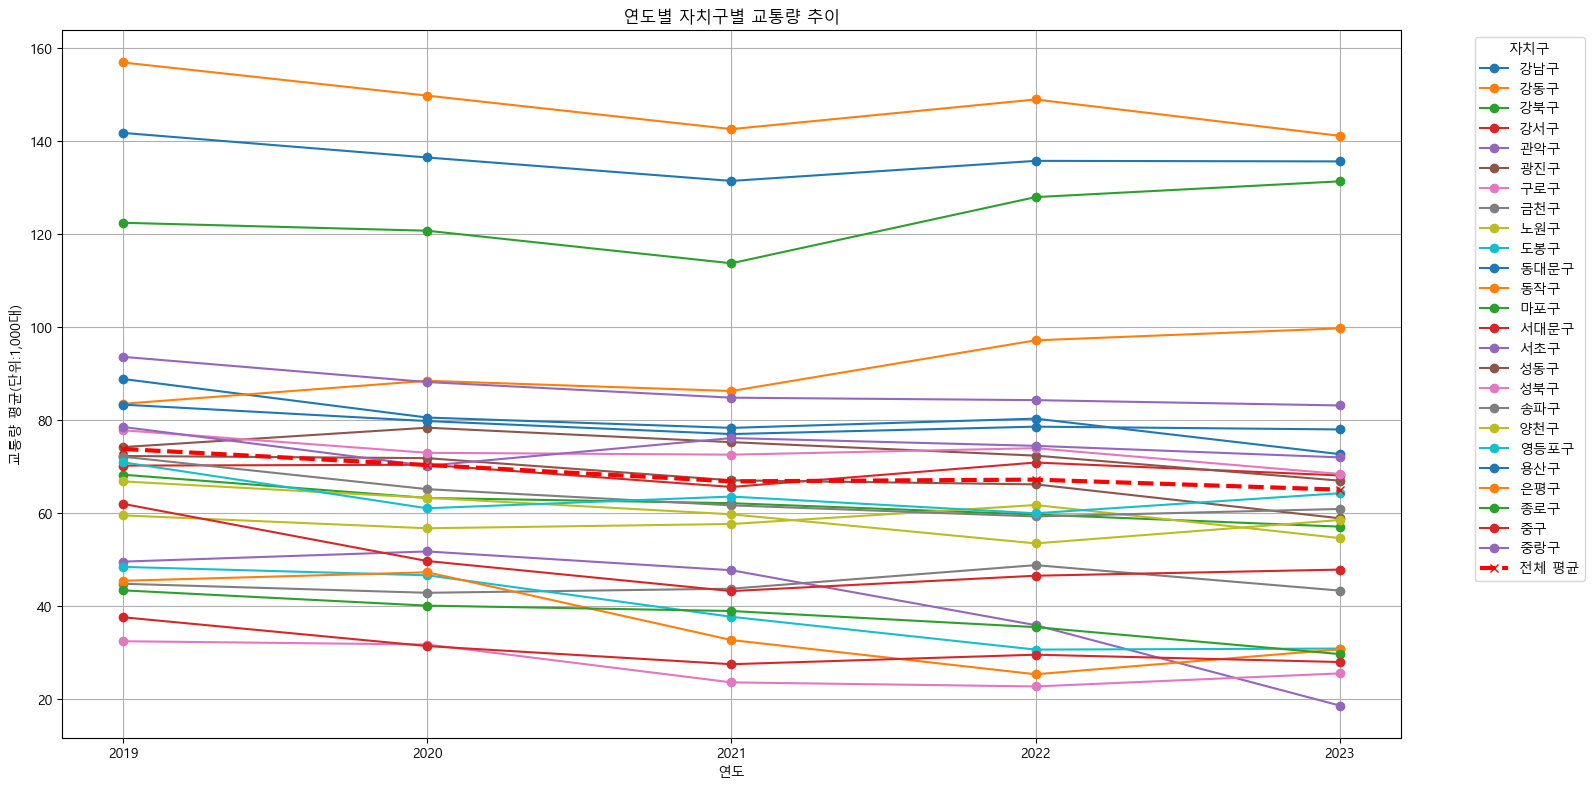

In [16]:
# 연도별 교통량 그리기
fig, ax1 = plt.subplots(figsize=(16, 8))

for region in annual_tf.columns:
    plt.plot(annual_tf.index, annual_tf[region], marker='o', label=region)

# 서울 전체 평균선 추가
ax1.plot(all_annual_tf.index, all_annual_tf, color='red', linestyle='--', linewidth=3, marker='x', label='전체 평균')

ax1.set_title('연도별 자치구별 교통량 추이')
ax1.set_xlabel('연도')
ax1.set_ylabel('교통량 평균(단위:1,000대)')

from matplotlib.ticker import MaxNLocator

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # X축을 정수로 표시 
ax1.xaxis.set_major_locator(MaxNLocator(nbins=5))  # X축 틱 수를 5개로 제한

# 레이블이 겹치지 않도록 범례 위치 조정
ax1.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)
plt.tight_layout()  # 그래프 레이아웃 조정

plt.show()

상위 3개구 : 동작구, 동대문구, 마포구

- 전반적으로 2019년 교통량이 높은 것으로 파악
- 2020년 부터 코로나 영향으로 관광객 감소, 재택근무-원격 수업 증가, 외출 자제 등으로 전체적으로 교통량 감소
- 2021년 지속된 코로나 영향으로 교통량 감소
- 2022년 사회적 거리두기 해제로 야간 교통량이 증가하였으나, 코로나 확진자수 증가, 유가상승, 고물가 등의 영향으로 주간 교통량이 감소하며 전년(2021)과 비슷한 수준
    주말 교통량은 사회적 거리두기 해제 영향이 크게 작용하며 전년대비 증가
- 2023년 코로나 상황은 호전되었으나 고금리/고물가로 인한 경기침체, 대중교통 이용이 증가하며 전년보다 소폭 증가

#### (추가) 연도별 교통량의 최고/최저 지역 및 교통량 비교

In [17]:
### 2-1. 연도별 교통량의 최고/최저 지역 및 교통량 비교

def find_extremes(df):
    # 연도별 최대값과 최소값 계산
    max_gu = df.idxmax(axis=1)
    max_values = df.max(axis=1)

    min_gu = df.idxmin(axis=1)
    min_values = df.min(axis=1)

    # 최대값과 최소값 데이터 프레임 병합
    extremes = pd.DataFrame({
        '최대값 자치구': max_gu,
        '최대 교통량': max_values,
        '최소값 자치구': min_gu,
        '최소 교통량': min_values
    })
    
    return extremes

# 연도별 최대값과 최소값을 가진 자치구와 해당하는 값을 구함

find_extremes(annual_tf)

,최대값 자치구,최대 교통량,최소값 자치구,최소 교통량
연도,,,,
2019,동작구,156.814108,구로구,32.406101
2020,동작구,149.689455,중구,31.362807
2021,동작구,142.497162,구로구,23.563100
2022,동작구,148.863967,구로구,22.684807
2023,동작구,141.048412,관악구,18.575837


---

### 2-2. 월별 분석

In [18]:
tf_df['월'] = tf_df['일자'].astype(str).str[4:6].astype(int)
tf_df.head(2)

,일자,구,일 통행량,"일 통행량(1,000대/일)",연월일,연도,월
0,20190101,강남구,65259.4,65.2594,2019-01-01,2019,1
1,20190101,강동구,68515.0,68.5150,2019-01-01,2019,1


In [19]:
# 자치구별, 월별 일 통행량 합계 계산
monthly_tf = tf_df.groupby(['구', '연도', '월'])['일 통행량(1,000대/일)'].sum().reset_index()
monthly_tf

,구,연도,월,"일 통행량(1,000대/일)"
0,강남구,2019,1,2719.1707
1,강남구,2019,2,2440.9184
2,강남구,2019,3,2840.0491
3,강남구,2019,4,2801.2758
4,강남구,2019,5,2870.1688
...,...,...,...,...
1495,중랑구,2023,8,2586.4270
1496,중랑구,2023,9,2494.8925
1497,중랑구,2023,10,2536.8910
1498,중랑구,2023,11,2182.9185


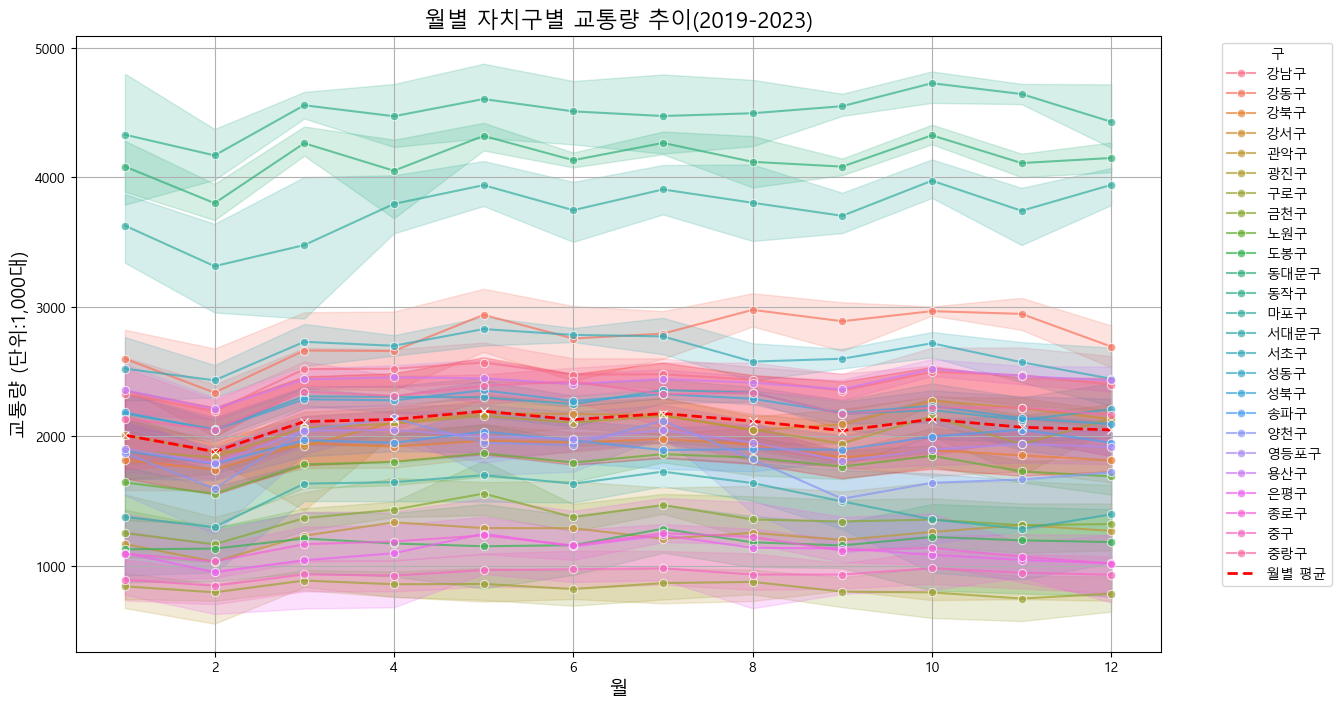

In [20]:
# 월별 평균선 추가
monthly_mean = monthly_tf.groupby(['월', '구'])['일 통행량(1,000대/일)'].mean().reset_index()

# 월별 자치구별 교통량 시각화
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_tf, x='월', y='일 통행량(1,000대/일)', hue='구', marker='o', alpha=0.7)
sns.lineplot(data=monthly_mean, x='월', y='일 통행량(1,000대/일)', color='red', linestyle='--', linewidth=2, marker='x', label='월별 평균')
plt.title('월별 자치구별 교통량 추이(2019-2023)', fontsize=16)
plt.xlabel('월', fontsize=14)
plt.ylabel('교통량 (단위:1,000대)', fontsize=14)
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

전체적으로 나들이 차량이 많은 5월이 가장 높고, 2월이 가장 낮게 분포하고 있다

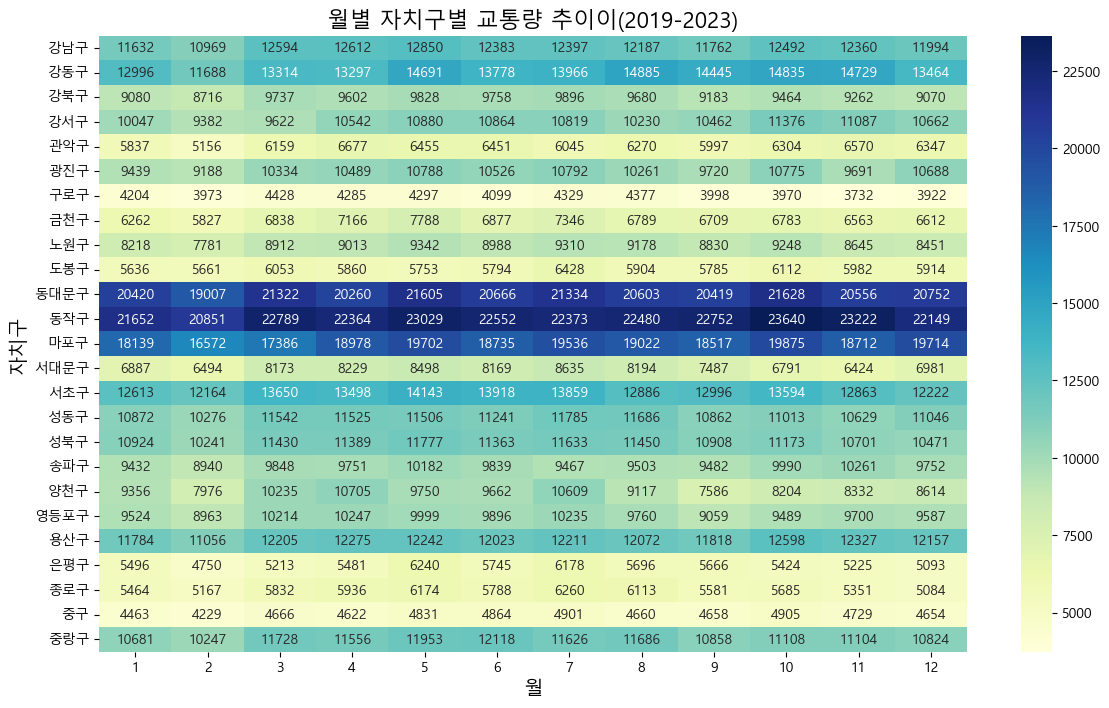

In [21]:
# 히트맵

pivot_table = monthly_tf.pivot_table(index='구', columns='월', values='일 통행량(1,000대/일)', aggfunc='sum')


plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('월별 자치구별 교통량 추이이(2019-2023)', fontsize=16)
plt.xlabel('월', fontsize=14)
plt.ylabel('자치구', fontsize=14)

plt.show()

In [22]:
# 서울시 월별 교통량 평균
all_monthly_tf  = monthly_tf[['월', '일 통행량(1,000대/일)']]
all_monthly_tf = all_monthly_tf.groupby(['월']).mean()

all_monthly_tf

,"일 통행량(1,000대/일)"
월,
1,2008.471534
2,1882.192219
3,2113.777902
4,2130.862923
5,2194.412151
6,2128.772904
7,2175.750741
8,2117.509573
9,2044.329768


### 2-3. 요일별 분석


In [23]:
tf_df['요일'] = tf_df['연월일'].dt.day_name()

# 요일 결과 한글로 변환
day_name_map = {
    'Monday': '월',
    'Tuesday': '화',
    'Wednesday': '수',
    'Thursday': '목',
    'Friday': '금',
    'Saturday': '토',
    'Sunday': '일'
}

tf_df['요일'] = tf_df['요일'].map(day_name_map)

In [24]:
tf_df.head(2)

,일자,구,일 통행량,"일 통행량(1,000대/일)",연월일,연도,월,요일
0,20190101,강남구,65259.4,65.2594,2019-01-01,2019,1,화
1,20190101,강동구,68515.0,68.5150,2019-01-01,2019,1,화


In [25]:
# 요일별 평균 통행량 계산
weekday_tf = tf_df.groupby(['구', '요일'])['일 통행량(1,000대/일)'].mean().reset_index()

# 요일 순서 지정
weekday_order = ['월', '화', '수', '목', '금', '토', '일']
weekday_tf['요일'] = pd.Categorical(weekday_tf['요일'], categories=weekday_order, ordered=True)
weekday_tf.head(2)

,구,요일,"일 통행량(1,000대/일)"
0,강남구,금,85.442958
1,강남구,목,84.268287


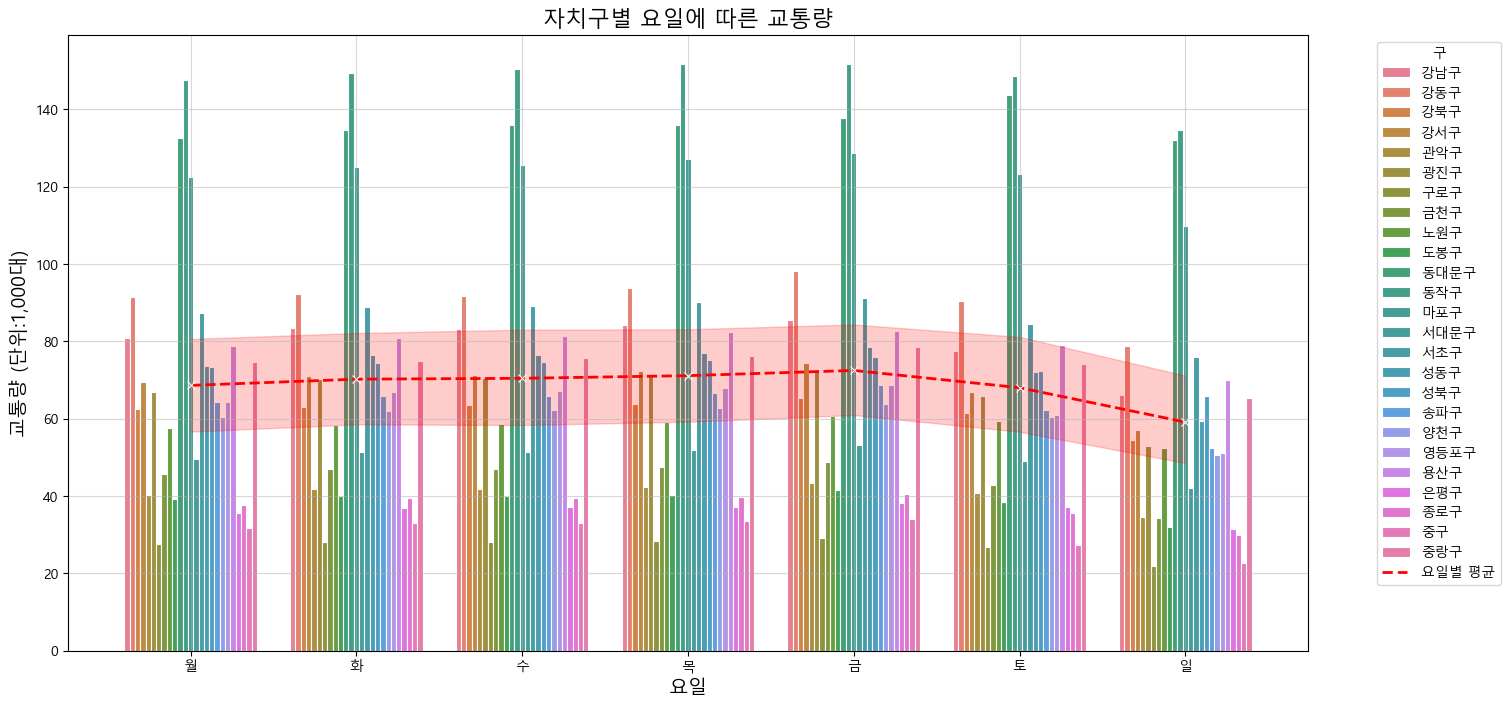

In [26]:
# 요일별 평균값 추가
weekday_mean = weekday_tf.groupby(['요일', '구'])['일 통행량(1,000대/일)'].mean().reset_index()


# 요일별 교통량

plt.figure(figsize=(16, 8))
sns.barplot(data=weekday_tf, x='요일', y='일 통행량(1,000대/일)', hue='구', dodge=True, linewidth=0.8, edgecolor='white')
sns.lineplot(data=weekday_mean, x='요일', y='일 통행량(1,000대/일)', color='red', linestyle='--', linewidth=2, marker='x', label='요일별 평균')
plt.title('자치구별 요일에 따른 교통량', fontsize=16)
plt.xlabel('요일', fontsize=14)
plt.ylabel('교통량 (단위:1,000대)', fontsize=14)
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.5)
plt.show()

요일별 상위 3개 자치구는 동작구, 동대문구, 마포구 순으로 나타났다.

In [27]:
# 자치구별 요일별 최대 교통량 추출
max_traffic_per_district = tf_df.groupby(['구', '요일'])['일 통행량(1,000대/일)'].max().reset_index()

# 요일별로 최대 교통량을 기준으로 상위 3개의 자치구 찾기
top_3_districts_per_weekday = max_traffic_per_district.groupby('요일').apply(
    lambda x: x.nlargest(3, '일 통행량(1,000대/일)')).reset_index(drop=True)

In [28]:
pivot_top_3 = top_3_districts_per_weekday.pivot(index='요일', columns='구', values='일 통행량(1,000대/일)')
pivot_top_3 = pivot_top_3[['동작구', '동대문구', '마포구']]
pivot_top_3

구,동작구,동대문구,마포구
요일,,,
금,171.4645,150.768,147.6802
목,169.6945,149.088,146.0260
수,167.8690,148.869,147.8142
월,165.1785,145.426,141.6854
일,160.4295,147.199,128.4546
토,169.3405,158.664,142.1648
화,170.4865,148.414,143.3246


### 2-4. 5년간 월단위 서울시 교통량 변화 추이

In [29]:
monthly_summary  = tf_df.groupby(['연도', '월'])['일 통행량(1,000대/일)'].sum().reset_index()
monthly_summary['연월'] = monthly_summary['연도'].astype(str) + '-' + monthly_summary['월'].astype(str).str.zfill(2)
monthly_summary['연월'] = pd.to_datetime(monthly_summary['연월'])

# 날짜를 인덱스로 설정
monthly_summary.set_index('연월', inplace=True)

In [30]:
monthly_summary.drop(['연도', '월'], axis=1, inplace=True)
monthly_summary.head()

,"일 통행량(1,000대/일)"
연월,
2019-01-01,56908.771533
2019-02-01,49599.357267
2019-03-01,55957.884767
2019-04-01,56979.145867
2019-05-01,57680.926633


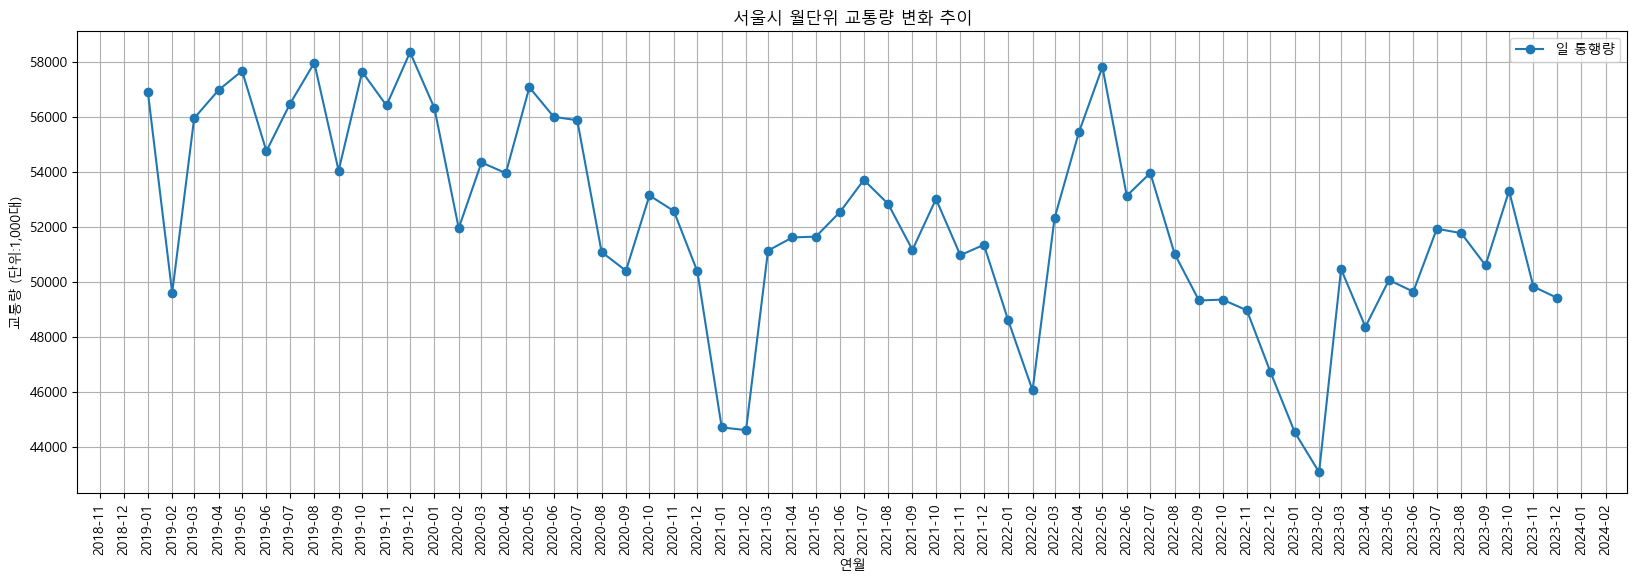

In [31]:
plt.figure(figsize=(20, 6))
plt.plot(monthly_summary.index, monthly_summary['일 통행량(1,000대/일)'], label='일 통행량', marker='o')
plt.title('서울시 월단위 교통량 변화 추이')
plt.xlabel('연월')
plt.ylabel('교통량 (단위:1,000대)')
plt.legend()
plt.grid()

import matplotlib.dates as mdates
#월까지 표시
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=90)  # x축 라벨 회전

plt.show()

- 2020년 부터 코로나 영향으로 관광객 감소, 재택근무-원격 수업 증가, 외출 자제 등으로 전체적으로 교통량 감소
- 2021년 지속된 코로나 영향으로 교통량 감소
- 2022년 사회적 거리두기 해제로 야간 교통량이 증가하였으나, 코로나 확진자수 증가, 유가상승, 고물가 등의 영향으로 주간 교통량이 감소하며 전년(2021)과 비슷한 수준
    주말 교통량은 사회적 거리두기 해제 영향이 크게 작용하며 전년대비 증가
- 2023년 코로나 상황은 호전되었으나 고금리/고물가로 인한 경기침체, 대중교통 이용이 증가하며 전년보다 소폭 증가

---

### 3. 전년 대비 교통량 현황 분석

- 전년도 대비 교통량의 변화량 계산

#### 3-1. 데이터 전처리 및 연도별 교통량 집계

In [32]:
tf_df.head(2)

,일자,구,일 통행량,"일 통행량(1,000대/일)",연월일,연도,월,요일
0,20190101,강남구,65259.4,65.2594,2019-01-01,2019,1,화
1,20190101,강동구,68515.0,68.5150,2019-01-01,2019,1,화


In [33]:
# 자치구별, 연도별 일 통행량 합계 계산
yearly_traffic = tf_df.groupby(['구', '연도'])['일 통행량(1,000대/일)'].sum().reset_index()

# 각 자치구별 연도별 교통량 확인
yearly_traffic_pivot = yearly_traffic.pivot(index='연도', columns='구', values='일 통행량(1,000대/일)')

yearly_traffic.head(), yearly_traffic_pivot.head()

(     구    연도  일 통행량(1,000대/일)
 0  강남구  2019       32404.5199
 1  강남구  2020       29459.2122
 2  강남구  2021       28568.6995
 3  강남구  2022       29293.9738
 4  강남구  2023       26506.5394,
 구            강남구         강동구           강북구         강서구         관악구  \
 연도                                                                   
 2019  32404.5199  30458.8842  24894.799533  25607.2050  18073.5426   
 2020  29459.2122  32353.1064  23133.420833  25746.6848  18924.6500   
 2021  28568.6995  31459.9855  22659.410667  23932.1812  17398.5465   
 2022  29293.9738  35437.2101  21769.034500  25849.6208  13089.3520   
 2023  26506.5394  36377.5919  20819.708567  24837.7810   6780.1805   
 
 구            광진구         구로구         금천구         노원구         도봉구  ...  \
 연도                                                                ...   
 2019  26362.3755  11828.2270  16338.6215  21702.2093  17662.4980  ...   
 2020  26265.0620  11602.0125  15671.1951  20748.4600  17048.7750  ...   
 2021  24454.1565 

#### 2. 전년도 대비 변화량 및 변화율 계산
- 변화량 : 현년도 교통량 - 전년도 교통량
- 변화율 : (변화량 / 전년도 교통량) * 100

각 자치구에서 전년도 대비 교통량이 어떻게 증가했는지, 감소했는지 파악

In [34]:
# 각 자치구별 전년도 대비 변화량/변화율 계산
yearly_traffic_diff = yearly_traffic_pivot.diff().dropna()
yearly_traffic_diff

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도,,,,,,,,,,,,,,,,,,,,,
2020,-2945.3077,1894.2222,-1761.378700,139.4798,851.1074,-97.3135,-226.2145,-667.4264,-953.7493,-613.7230,...,1600.2946,-1695.5786,-2482.5044,-1224.2040,-3544.9723,-1208.2714,715.2367,-1159.3777,-2231.6410,-2974.8345
2021,-890.5127,-893.1209,-474.010167,-1814.5036,-1526.1035,-1810.9055,-3001.4810,279.1481,278.3558,-3304.3345,...,-1212.3898,-220.0470,-1334.1745,-1356.6436,857.9441,-1100.2445,-5364.4938,-461.6095,-1454.4012,2102.3510
2022,725.2743,3977.2246,-890.376167,1917.4396,-4309.1945,-318.5745,-320.5770,1847.7301,1488.3658,-2572.6240,...,-1057.5876,510.9340,-872.3612,-2283.7978,-1312.0413,580.5209,-2685.5626,-1265.2155,748.2181,-609.4385
2023,-2787.4344,940.3818,-949.325933,-1011.8398,-6309.1715,-2660.4920,1024.1477,-1996.1966,-2593.4989,81.3125,...,-1963.1992,-2024.8808,588.6073,1835.1520,1571.5175,-218.0319,1956.7949,-2115.2571,-577.0875,-904.4095


In [35]:
# 변화량 계산
yearly_traffic_diff = yearly_traffic_diff.rename_axis(index='연도', columns='구')


# 변화율 계산(%)
yearly_traffic_rate = (yearly_traffic_diff / yearly_traffic_pivot.shift(1)) * 100

In [36]:
# 소수점 한자리로 정리

yearly_traffic_rate = yearly_traffic_rate.round(1)
yearly_traffic_diff = yearly_traffic_diff.round(1)

yearly_traffic_rate.head()

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도,,,,,,,,,,,,,,,,,,,,,
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,-9.1,6.2,-7.1,0.5,4.7,-0.4,-1.9,-4.1,-4.4,-3.5,...,5.9,-6.0,-9.4,-5.0,-13.7,-4.0,4.3,-7.3,-16.3,-10.4
2021,-3.0,-2.8,-2.0,-7.0,-8.1,-6.9,-25.9,1.8,1.3,-19.4,...,-4.2,-0.8,-5.6,-5.9,3.8,-3.8,-31.0,-3.1,-12.7,8.2
2022,2.5,12.6,-3.9,8.0,-24.8,-1.3,-3.7,11.6,7.1,-18.7,...,-3.9,1.9,-3.9,-10.5,-5.7,2.1,-22.5,-8.9,7.5,-2.2
2023,-9.5,2.7,-4.4,-3.9,-48.2,-11.0,12.4,-11.2,-11.5,0.7,...,-7.4,-7.5,2.7,9.4,7.2,-0.8,21.2,-16.4,-5.4,-3.3


In [37]:
# 연도별 최대 변화량을 가진 자치구 확인
max_diff_yearly = yearly_traffic_diff.idxmax(axis=1)
max_diff_values = yearly_traffic_diff.max(axis=1)

# 연도별 최소 변화량을 가진 자치구 확인
min_diff_yearly = yearly_traffic_diff.idxmin(axis=1)
min_diff_values = yearly_traffic_diff.min(axis=1)

# dataframe
yearly_extremes = pd.DataFrame({
    '연도':yearly_traffic_diff.index,
    '최대(구)':max_diff_yearly,
    '최대(증감량)':max_diff_values,
    '최소(구)':min_diff_yearly,
    '최소(증감량)':min_diff_values,
})


yearly_extremes = yearly_extremes.reset_index(drop=True)
yearly_extremes

,연도,최대(구),최대(증감량),최소(구),최소(증감량)
0,2020,강동구,1894.2,서대문구,-4436.7
1,2021,중랑구,2102.4,은평구,-5364.5
2,2022,마포구,5191.7,관악구,-4309.2
3,2023,은평구,1956.8,관악구,-6309.2


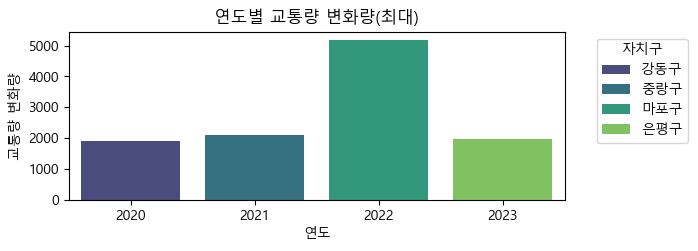

In [38]:
# 최대 변화량을 가진 자치구와 변화량
plt.subplot(2, 1, 1)
sns.barplot(x='연도', y='최대(증감량)', hue='최대(구)', data=yearly_extremes, dodge=False, palette='viridis')
plt.title('연도별 교통량 변화량(최대)')
plt.ylabel('교통량 변화량')
plt.xlabel('연도')
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left')

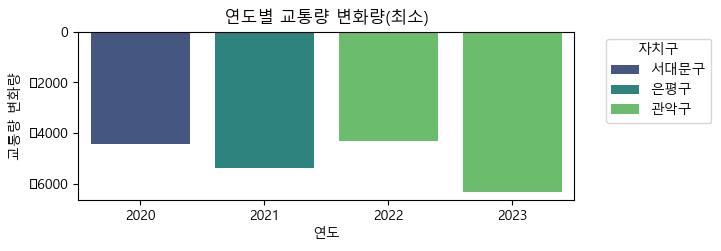

In [39]:
# 최소 변화량을 가진 자치구와 변화량
plt.subplot(2, 1, 1)
sns.barplot(x='연도', y='최소(증감량)', hue='최소(구)', data=yearly_extremes, dodge=False, palette='viridis')
plt.title('연도별 교통량 변화량(최소)')
plt.ylabel('교통량 변화량')
plt.xlabel('연도')
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left')

#### 3. 요약 및 시각화
- 어떤 자치구가 특정 연도에 교통량이 가장 많이 증가했는가?
- 교통량의 감소가 두드러진 자치구는 어디인가?
- 전반적인 추세에서 어떤 패턴이 나타나는가?

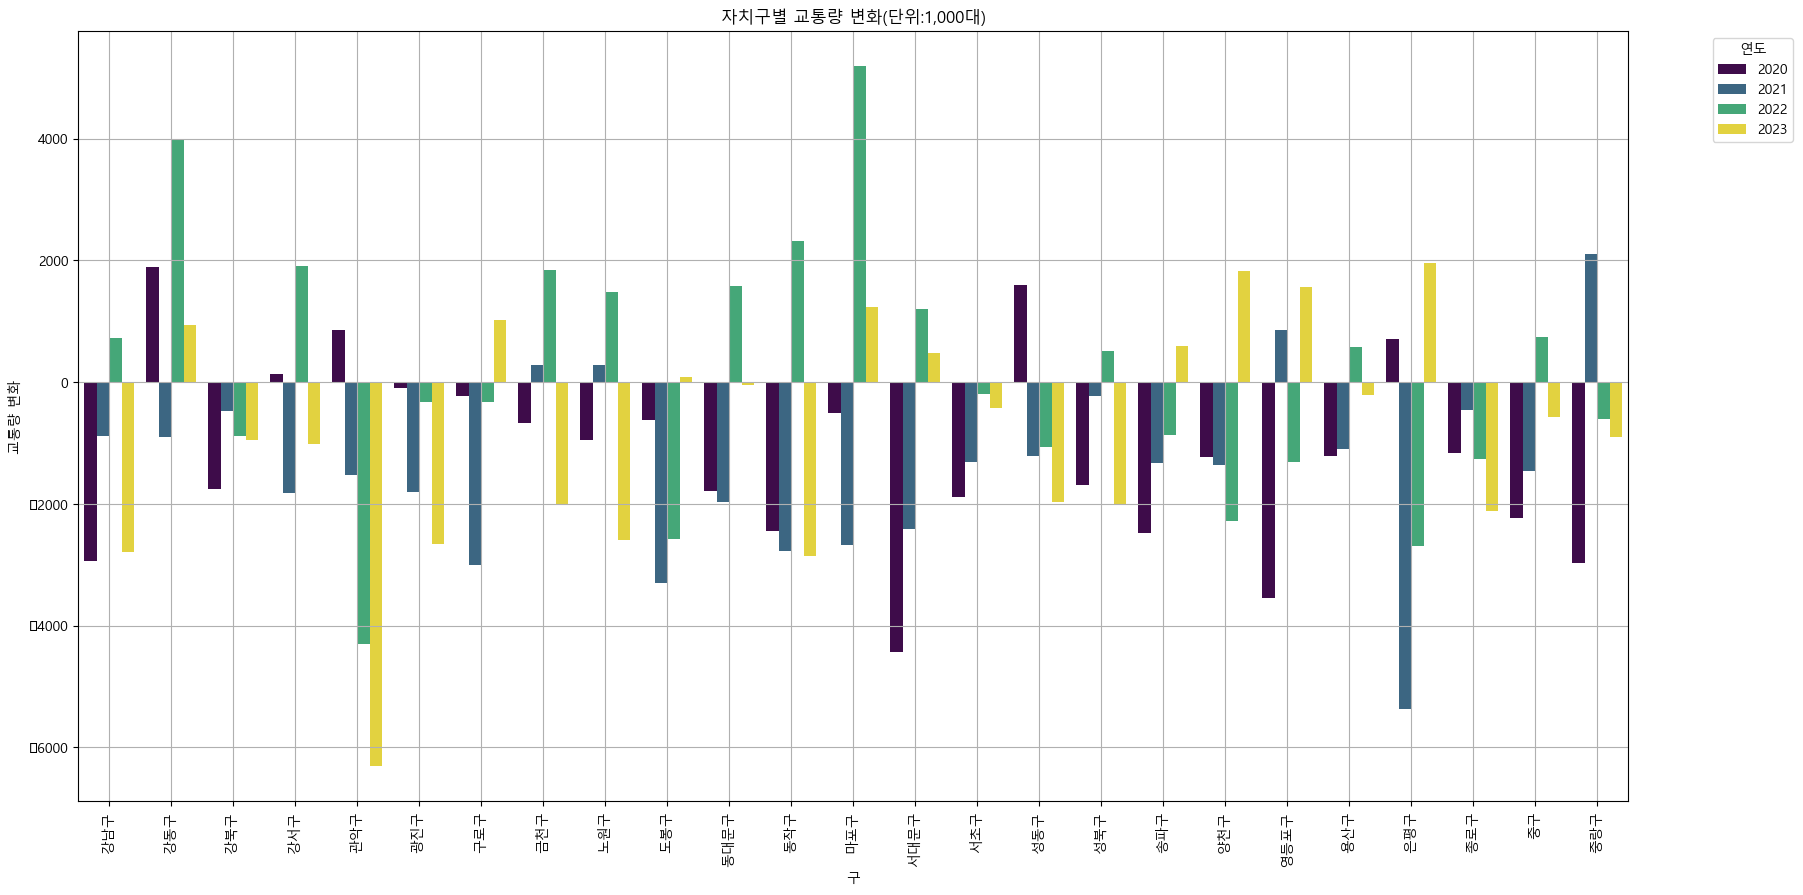

In [40]:
# 자치구별 교통량 변화량
plt.figure(figsize=(20, 10))
sns.barplot(data=yearly_traffic_diff.reset_index().melt(id_vars='연도', var_name='구', value_name='교통량 변화량'),
            x='구', y='교통량 변화량', hue='연도', palette='viridis')

plt.title('자치구별 교통량 변화(단위:1,000대)')
plt.xlabel('구')
plt.ylabel('교통량 변화')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.legend(title='연도', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [41]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 경우
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 기호 깨짐 방지

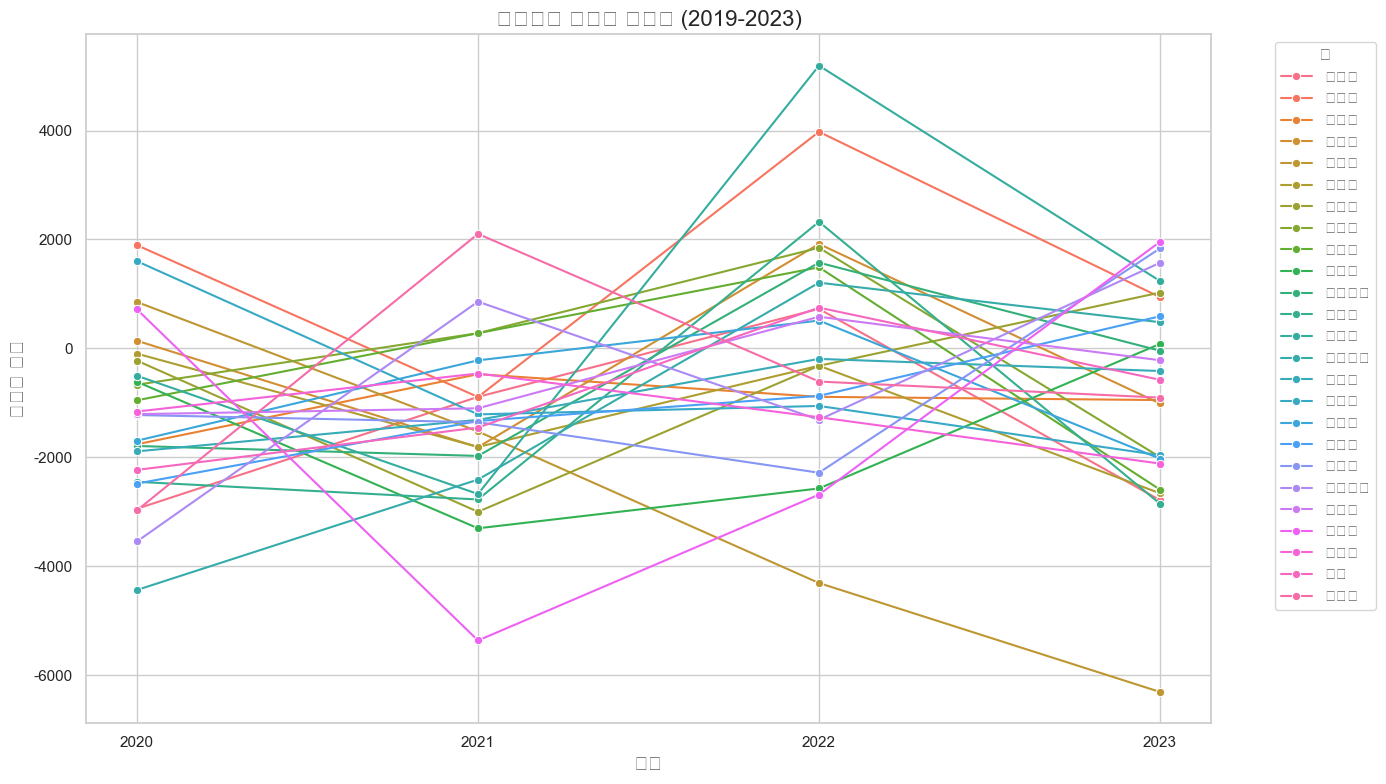

In [42]:
# 데이터를 연도별, 자치구별로 정리하기 위해 melt 사용
sns.set(style="whitegrid", palette="muted")
yearly_diff_long = yearly_traffic_diff.reset_index().melt(id_vars="연도", var_name="구", value_name="교통량 변화량")

# 시각화
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_diff_long, x='연도', y='교통량 변화량', hue='구', marker='o')

plt.title('자치구별 교통량 변화량 (2019-2023)', fontsize=16)
plt.xlabel('연도', fontsize=14)
plt.ylabel('교통량 변화', fontsize=14)
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(yearly_diff_long['연도'].unique())  # 연도 라벨 맞춤
plt.grid(True)
plt.tight_layout()
plt.show()

글자가 자꾸 깨짐...........

---

## 미세먼지 & 교통량 EDA 분석

In [113]:
air_url = 'https://raw.githubusercontent.com/jjiwonnn12/Data/main/2019_2023_%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80_%EC%97%B0%EC%9B%94%EC%9D%BC_%EB%93%B1%EA%B8%89.csv'

air_df = pd.read_csv(air_url, sep=',')

In [132]:
air_df.head(2)

,지역,date,SO2,CO,O3,NO2,PM10,PM25,연월일,연도,월,일,요일,미세먼지(PM10) 등급,초미세먼지(PM2.5) 등급
0,강남구,2019-01-01,0.004437,0.841667,0.013542,0.025854,36.416667,25.708333,2019-01-01,2019,1,1,화,보통,보통
1,강남구,2019-01-02,0.004854,0.900000,0.009833,0.031917,33.074275,21.828804,2019-01-02,2019,1,2,수,보통,보통


In [130]:
traf_df = tf_df

In [131]:
traf_df.head(2)

,날짜,지역,일 통행량,"일 통행량(1,000대/일)"
0,20190101,강남구,65259.4,65.2594
1,20190101,강동구,68515.0,68.5150


In [133]:
# 컬럼 정리 및 에러 컬럼 삭제
air_df.drop(['연월일', '연도', '월', '일', '요일'], axis=1, inplace=True)

In [134]:
air_df.head()

,지역,date,SO2,CO,O3,NO2,PM10,PM25,미세먼지(PM10) 등급,초미세먼지(PM2.5) 등급
0,강남구,2019-01-01,0.004437,0.841667,0.013542,0.025854,36.416667,25.708333,보통,보통
1,강남구,2019-01-02,0.004854,0.900000,0.009833,0.031917,33.074275,21.828804,보통,보통
2,강남구,2019-01-03,0.004964,1.102652,0.004911,0.040640,38.901087,24.388258,보통,보통
3,강남구,2019-01-04,0.005558,1.247283,0.004013,0.048946,61.451993,44.906703,보통,나쁨
4,강남구,2019-01-05,0.005167,0.685417,0.012458,0.027854,63.625000,41.854167,보통,나쁨


In [135]:
traf_df.head()

,날짜,지역,일 통행량,"일 통행량(1,000대/일)"
0,20190101,강남구,65259.4,65.2594
1,20190101,강동구,68515.0,68.5150
2,20190101,강북구,57515.3,57.5153
3,20190101,강서구,54479.0,54.4790
4,20190101,관악구,25493.5,25.4935


In [138]:
# 필요한 열 선택 및 열 이름 변경
air_df = air_df.rename(columns={'날짜': 'date', 'SO2': 'SO2', 'CO': 'CO', 'O3': 'O3', 'NO2': 'NO2', 'PM10': 'PM10', \
                                'PM25': 'PM25', '미세먼지(PM10) 등급': '미세먼지(PM10) 등급', '초미세먼지(PM2.5) 등급': '초미세먼지(PM2.5) 등급'})
traf_df = traf_df.rename(columns={'날짜': 'date', '일 통행량(1,000대/일)': '일 통행량(1,000대/일)'})

In [139]:
# 날짜 형식 변환
air_df['date'] = pd.to_datetime(air_df['date'], format='%Y%m%d')
traf_df['date'] = pd.to_datetime(traf_df['date'], format='%Y%m%d')

# 데이터 병합
merged_data = pd.merge(air_df, traf_df, on='date')
merged_data.head()

,지역_x,date,SO2,CO,O3,NO2,PM10,PM25,미세먼지(PM10) 등급,초미세먼지(PM2.5) 등급,지역_y,일 통행량,"일 통행량(1,000대/일)"
0,강남구,2019-01-01,0.004437,0.841667,0.013542,0.025854,36.416667,25.708333,보통,보통,강남구,65259.4,65.2594
1,강남구,2019-01-01,0.004437,0.841667,0.013542,0.025854,36.416667,25.708333,보통,보통,강동구,68515.0,68.5150
2,강남구,2019-01-01,0.004437,0.841667,0.013542,0.025854,36.416667,25.708333,보통,보통,강북구,57515.3,57.5153
3,강남구,2019-01-01,0.004437,0.841667,0.013542,0.025854,36.416667,25.708333,보통,보통,강서구,54479.0,54.4790
4,강남구,2019-01-01,0.004437,0.841667,0.013542,0.025854,36.416667,25.708333,보통,보통,관악구,25493.5,25.4935


In [140]:
import matplotlib.dates as mdates

### 시각화-시간에 따른 경과


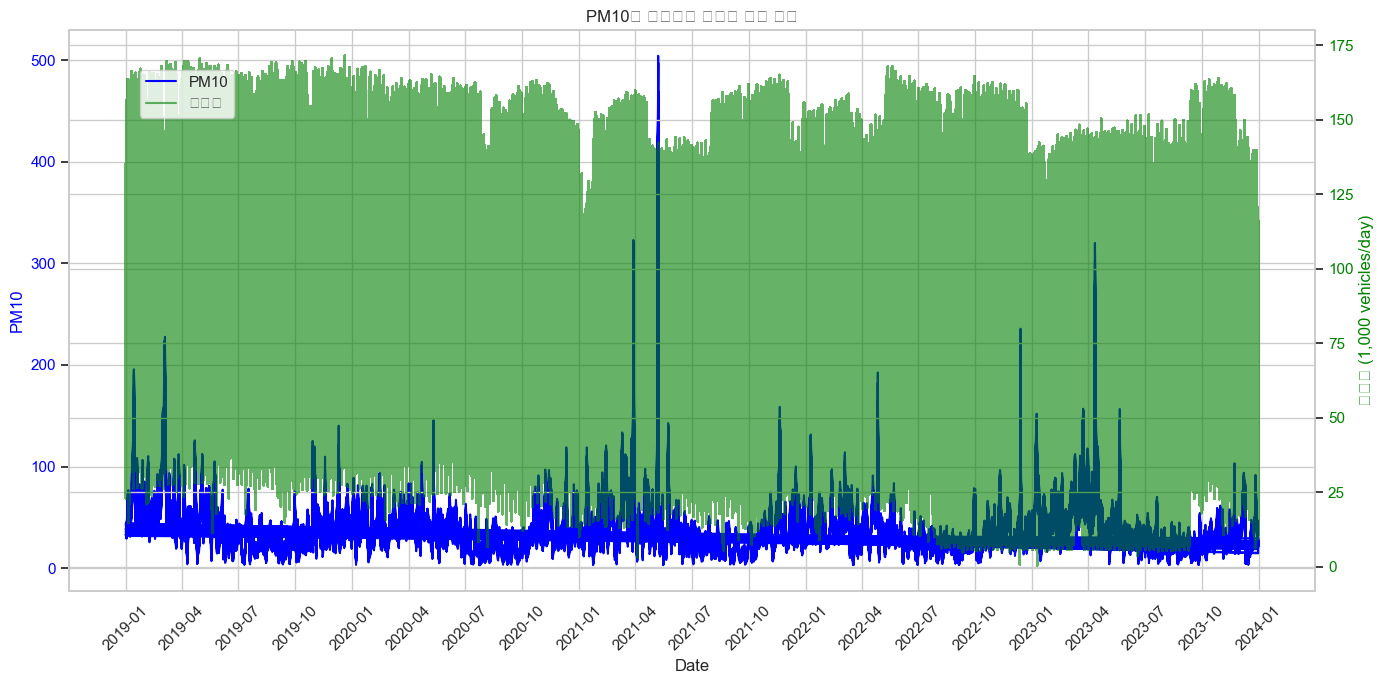

In [141]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot PM10
ax1.plot(merged_data['date'], merged_data['PM10'], label='PM10', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM10', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# plot 교통량
ax2 = ax1.twinx()
ax2.plot(merged_data['date'], merged_data['일 통행량(1,000대/일)'], label='통행량', color='green', alpha=0.6)
ax2.set_ylabel('통행량 (1,000 vehicles/day)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('PM10과 교통량의 시간에 따른 경과')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

In [150]:
# 강남구만 비교

merged_data_gangnam = merged_data[merged_data['지역_y'] == '강남구']

In [152]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 경우
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 기호 깨짐 방지

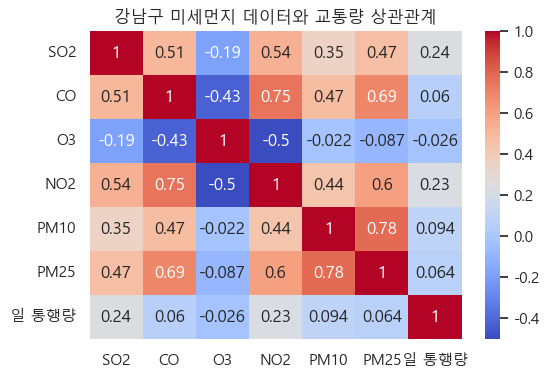

In [153]:
# 상관계수
correlation_matrix = merged_data_gangnam[['SO2', 'CO','O3','NO2','PM10','PM25', '일 통행량']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('강남구 미세먼지 데이터와 교통량 상관관계')
plt.show()